In [1]:
#import dependencies
import json
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use('ggplot')

In [2]:
#twitter API
from config import consumer_key, consumer_secret, access_token, access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Vader library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
#target users
target_users = ("@BBC", "@CBS", "@CNN","@FoxNews","@nytimes") #BBC, CBS, CNN, Fox, New York times            

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

result_list = []

for user in target_users:
    public_tweets = api.user_timeline(user, count = 100)
        # Variables for holding sentiments
    sentiments = []
    counter=1

    for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            sentiments.append({"Username": user, 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            counter +=1

    # Create a dictionaty of results
    result_list.append(sentiments)
      
df_BBC = pd.DataFrame(result_list[0])
df_CBS = pd.DataFrame(result_list[1])
df_CNN = pd.DataFrame(result_list[2])
df_Fox = pd.DataFrame(result_list[3])
df_NYtimes = pd.DataFrame(result_list[4])

df_BBC.to_csv('BBC.csv')
df_CBS.to_csv('CBS.csv')
df_CNN.to_csv('CNN.csv')
df_Fox.to_csv('Fox.csv')
df_NYtimes.to_csv('NYtimes.csv')

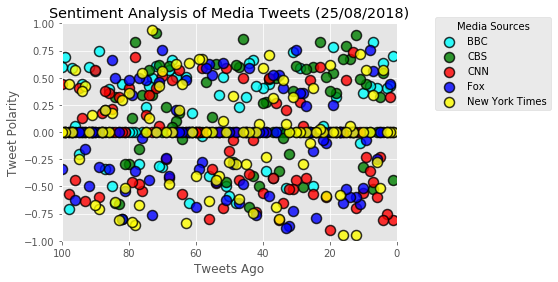

In [7]:
# Create plot
plt.scatter(df_BBC["Tweets Ago"],
         df_BBC["Compound"], marker="o",edgecolors="black",
         alpha=0.8, label = "BBC", color = 'cyan',s=100,linewidth='1.5')

plt.scatter(df_CBS["Tweets Ago"],
         df_CBS["Compound"], marker="o",edgecolors="black",
         alpha=0.8, label = "CBS", color = 'green',s=100,linewidth='1.5')

plt.scatter(df_CNN["Tweets Ago"],
         df_CNN["Compound"], marker="o",edgecolors="black",
         alpha=0.8, label = "CNN", color = 'red',s=100,linewidth='1.5')

plt.scatter(df_Fox["Tweets Ago"],
         df_Fox["Compound"], marker="o",edgecolors="black",
         alpha=0.8, label = "Fox", color = 'blue',s=100,linewidth='1.5')

plt.scatter(df_NYtimes["Tweets Ago"],
         df_NYtimes["Compound"], marker="o",edgecolors="black",
         alpha=0.8, label = "New York Times", color='yellow',s=100,linewidth='1.5')


# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%d/%m/%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim(100,0)
plt.ylim(-1,1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.1, 1.05), title = "Media Sources")
plt.savefig('scatterplot.png')
plt.show()

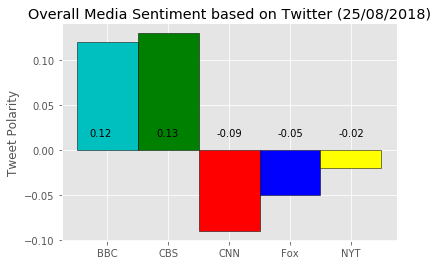

In [8]:
#mean
BBC_mean  = round(np.mean(df_BBC['Compound']),2)
CBS_mean = round(np.mean(df_CBS['Compound']),2)
CNN_mean = round(np.mean(df_CNN['Compound']),2)
Fox_mean = round(np.mean(df_Fox['Compound']),2)
NYtimes_mean = round(np.mean(df_NYtimes['Compound']),2)

means = [BBC_mean,CBS_mean,CNN_mean,Fox_mean,NYtimes_mean]


fig, ax = plt.subplots()
x_axis = np.arange(5)
tick_locations = [value for value in x_axis] 
ax.set_xticklabels([" ", "BBC", "CBS", "CNN", "Fox","NYT"],rotation="horizontal")
ax.bar(x_axis,means,color=['c', 'g', 'r', 'b','yellow'],align='center',width=-1, edgecolor="black")

# Use functions to label the percentages of changes
ax.text(-0.3,0.015,s = BBC_mean ,color='black')
ax.text(0.8,0.015,s = CBS_mean ,color='black')
ax.text(1.8,0.015,s = CNN_mean,color='black')
ax.text(2.8,0.015,s = Fox_mean,color='black')
ax.text(3.8,0.015,s = NYtimes_mean,color='black')

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%d/%m/%Y")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.savefig('bargraph.png')
plt.show()